In [ ]:
#https://huggingface.co/docs/transformers/en/model_doc/mgp-str

In [ ]:
! pip install transformers torch

In [29]:
from transformers import MgpstrProcessor, MgpstrForSceneTextRecognition
import requests
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
processor = MgpstrProcessor.from_pretrained('alibaba-damo/mgp-str-base')
model = MgpstrForSceneTextRecognition.from_pretrained('alibaba-damo/mgp-str-base')

In [43]:
# load image from the IIIT-5k dataset
url = "https://i.postimg.cc/ZKwLg2Gw/367-14.png"
image = Image.open(requests.get(url, stream=True).raw).convert("RGB")
#image =Image.open(url).convert("RGB")
pixel_values = processor(images=image, return_tensors="pt").pixel_values
outputs = model(pixel_values)

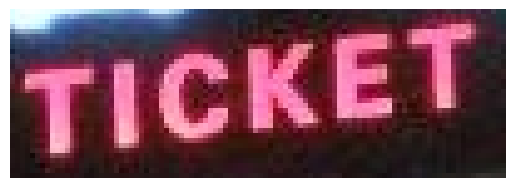

In [44]:
# Display the image
plt.imshow(image)
plt.axis('off')
plt.show()

In [45]:
generated_text = processor.batch_decode(outputs.logits)

In [46]:
generated_text

{'generated_text': ['ticket'],
 'scores': [tensor(0.9999, grad_fn=<SelectBackward0>)],
 'char_preds': ['ticket'],
 'bpe_preds': ['ticket'],
 'wp_preds': ['ticket']}